Produce training set for speculator

In [1]:
import os
import tqdm
import numpy as np 
import astropy.units as u
from astropy.cosmology import Planck13 as cosmo
# -- gqp_mc --
from gqp_mc import util as UT
from gqp_mc import fitters as Fitters
# -- plotting --
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
speculate = Fitters.iSpeculator(model_name='fsps')

First we need to sample the prior space of our paremeters: 

$$\beta_1, \beta_2, \beta_3, \beta_4, \gamma_1, \gamma_2, \tau_{\rm dust}, t_{\rm age}$$

The actual prior we want to sample later is a uniform prior with the range

$$\beta_1, \beta_2, \beta_3, \beta_4 \in [0, 1]$$

$$\gamma_1, \gamma_2 \in [6.9e-5, 7.3e-3]$$

$$\tau_{\rm dust} \in [0, 3]$$

$$t_{\rm age} \in [13.8, 8.6]$$
Redshift within 0, 0.5

In [4]:
def sample_prior(n_sample): 
    ''' sample a padded uniform prior
    '''    
    prior_min = np.array([0.0, 0.0, 0.0, 0.0, 6.5e-5, 6.5e-5, 0.0, 8.6])
    prior_max = np.array([1.1, 1.1, 1.1, 1.1, 7.5e-3, 7.5e-3, 3.5, 13.8])
    return prior_min + (prior_max - prior_min) * np.random.uniform(size=(n_sample, len(prior_min)))

In [5]:
theta_train = sample_prior(600000)
theta_train[:590000,:4] = speculate._transform_to_SFH_basis(np.random.uniform(size=(590000,4)))

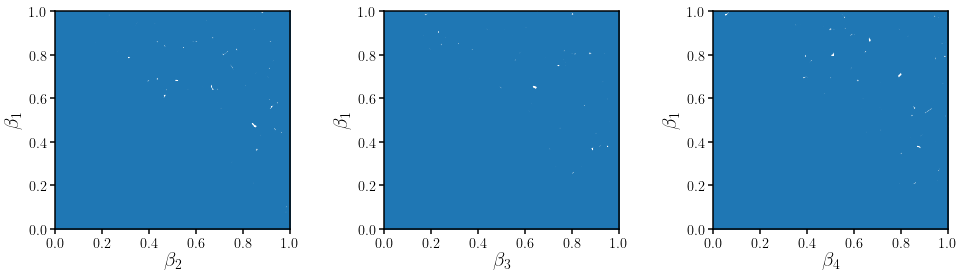

In [6]:
fig = plt.figure(figsize=(16,4))
for i in range(3): 
    sub = fig.add_subplot(1,3,i+1)
    sub.scatter(theta_train[:,i+1], theta_train[:,0])
    sub.set_xlabel(r'$\beta_{%i}$' % (i+2), fontsize=20)
    sub.set_xlim(0, 1)
    sub.set_ylabel(r'$\beta_1$', fontsize=20)
    sub.set_ylim(0, 1)
fig.subplots_adjust(wspace=0.4)

Now that we have the parameters for our training sample. Lets generate FSPS spectra for each of them

In [7]:
wmin, wmax = 2300., 11030.

In [8]:
w_fsps, _ = speculate._fsps_model(theta_train[0])
wlim = (w_fsps >= wmin) & (w_fsps <= wmax)

fwave = os.path.join(UT.dat_dir(), 'speculator', 'wave_fsps.npy')

np.save(fwave, w_fsps[wlim])

/Users/ChangHoon/opt/anaconda3/envs/gqp/lib/python3.7/site-packages/gqp_mc/fitters.py:2425: RuntimeWarning: divide by zero encountered in log10
  self._ssp.params['logzsol'] = np.log10(z/0.0190) # log(Z/Zsun)


In [10]:
for i in range(2,100): 
    print('--- batch %i ---' % i)
    i_batch = range(6000*i,6000*(i+1))
    
    logspectra_train = [] 
    for _theta in tqdm.tqdm(theta_train[i_batch]): 
        _, _spectrum = speculate._fsps_model(_theta)
        logspectra_train.append(np.log(_spectrum[wlim]))
                
    ftheta = os.path.join(UT.dat_dir(), 'speculator', 'DESI_simpledust.theta_train.%i.npy' % i)
    fspectrum = os.path.join(UT.dat_dir(), 'speculator', 'DESI_simpledust.logspectrum_fsps_train.%i.npy' % i) 
    
    np.save(ftheta, theta_train[i_batch])
    np.save(fspectrum, np.array(logspectra_train))

  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 2 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 3 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 4 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 5 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 6 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 7 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 8 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 9 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 10 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 11 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 12 ---


  0%|          | 1/6000 [00:00<18:07,  5.52it/s]

--- batch 13 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 14 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 15 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 16 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 17 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 18 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 19 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 20 ---


  0%|          | 2/6000 [00:00<09:02, 11.05it/s]

--- batch 21 ---


  0%|          | 1/6000 [00:00<13:42,  7.29it/s]

--- batch 22 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 23 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 24 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 25 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 26 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 27 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 28 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 29 ---


  0%|          | 0/6000 [00:00<?, ?it/s]

--- batch 30 ---


100%|██████████| 6000/6000 [24:56<00:00,  4.01it/s]


OSError: 26814000 requested and 10380288 written